In [2]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#import the entire table from fitsfile
peakvel=Table.read('test_peakvel_horizontal.fits')
peakvel

spectral_axis [58],bin_lower,bin_upper,bin_mean,bin_type,bin_unit,bin_area,sfr_mean_w4fuv,CO_stack_profile [58],CO_stack_sum,CO_stack_noise,HCN_stack_profile [58],HCN_stack_sum,HCN_stack_noise,HCOp_stack_profile [58],HCOp_stack_sum,HCOp_stack_noise,13CO_stack_profile [58],13CO_stack_sum,13CO_stack_noise,C18O_stack_profile [58],C18O_stack_sum,C18O_stack_noise,galaxy
float64,float64,float64,float64,bytes11,bytes10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes7
603.3873105475999 .. -582.5808515631999,0.5397762545208092,1.4672639840976003,1.0035201193092047,intensity,K km/s,13.03794431743186,0.008219085374650771,0.0010409919035002113 .. 0.0009393852953543517,1.4604553664541833,0.12245529211409596,-0.0002170404962333525 .. -0.00016848361264250894,0.2056386483720721,0.029709188837605455,7.605648388943748e-05 .. -9.269685919252299e-05,0.06548413036118374,0.028141985912161768,-0.000475798123764978 .. 0.00020509882066145282,0.05390171134000884,0.05982811684861805,-0.00021571643587991513 .. 4.966385925092051e-05,0.017987259716067076,0.05303340580598611,NGC2903
603.3873105475999 .. -582.5808515631999,1.4672639840976003,3.988437025524928,2.727850504811264,intensity,K km/s,14.973738429745849,0.01654300033113567,-0.0013088538731749937 .. 7.464645274710814e-05,3.1336052471865825,0.1149198450377734,-0.0003613527612431959 .. -0.0001613680792594447,0.2110907028963271,0.028164565324154327,1.8483407298361456e-05 .. -1.795735769755148e-05,0.0452968543973981,0.02931783331784059,-0.00010595019631392199 .. -9.602471812459992e-05,0.08447957420927274,0.04460710888485678,-0.0003113943732205779 .. -0.0002693407451373952,0.10321883699614638,0.04226057662969131,NGC2903
603.3873105475999 .. -582.5808515631999,3.988437025524928,10.841695890437656,7.4150664579812915,intensity,K km/s,18.62948898331443,0.033162821213382654,-0.0002164233168786913 .. 1.339628439281136e-05,7.191552932628224,0.12263288191363732,-0.0002541372455136703 .. -2.0854526037458178e-05,0.009737198281030812,0.036441380040263725,-0.00036093666168619657 .. -0.0005136583607839196,0.05096268608856799,0.04554400067752441,-0.00011631897177661746 .. 0.00012326575937960621,0.0011792834635088942,0.05773768720060952,-0.00016694342860039564 .. 0.00015428623772342195,0.09997456967930429,0.05388157158717954,NGC2903
603.3873105475999 .. -582.5808515631999,10.841695890437656,29.47078492865579,20.156240409546722,intensity,K km/s,8.12089237360991,0.08322089047039483,-9.138150524259448e-06 .. 0.0002681688343312804,17.881674294709185,0.20435849829250852,0.00021245610791859556 .. -0.00035092180599061477,0.2353230111377113,0.046047844277984064,-3.268411344398385e-05 .. -0.000136401339595536,0.09886131930395323,0.04806200094615294,-0.00010786771390812061 .. 0.0005077679753530416,0.5612286258398117,0.07088249255463162,-0.0006235856756477867 .. 0.00027599704997130335,0.4890961573714386,0.07696917353882633,NGC2903
603.3873105475999 .. -582.5808515631999,29.47078492865579,80.10989914198973,54.79034203532276,intensity,K km/s,1.585057896842466,0.40884078097338505,0.0008347179531721522 .. -1.0452649949630067e-05,43.943501926029235,0.23734241493404926,0.00023579408642154654 .. 0.0006455060667897064,1.312967076472721,0.07612385231921552,0.00016105980867182977 .. -0.0007502629627122201,0.5519898556993501,0.060428648675430324,0.0014034949707942888 .. 0.0007541787469628275,1.968508373855513,0.12464959683818976,0.0008635374645570576 .. -0.0006246076142889006,0.5155712955439344,0.10533836338190428,NGC2903
603.3873105475999 .. -582.5808515631999,80.10989914198973,217.76128311735752,148.93559112967364,intensity,K km/s,0.13489854441212476,1.2939043954660978,-9.558924533141164e-18 .. -1.167050172976121e-17,87.39989444695789,0.6202683819219796,0.00022998869724048478 .. 0.0019851924671881495,3.8194494948805757,0.22369282121191178,0.0017932386619109245 .. 0.00038592209256115543,1.9808577649711472,0.1742904293770151,0.0032332219623490152 ..

In [4]:
#take a look at the column names
peakvel.columns

<TableColumns names=('spectral_axis','bin_lower','bin_upper','bin_mean','bin_type','bin_unit','bin_area','sfr_mean_w4fuv','CO_stack_profile','CO_stack_sum','CO_stack_noise','HCN_stack_profile','HCN_stack_sum','HCN_stack_noise','HCOp_stack_profile','HCOp_stack_sum','HCOp_stack_noise','13CO_stack_profile','13CO_stack_sum','13CO_stack_noise','C18O_stack_profile','C18O_stack_sum','C18O_stack_noise','galaxy')>

In [5]:
#select subset of the data based on galaxy and binning type
galaxy="NGC2903"
bintype="radius"
t_ind=(peakvel["galaxy"]==galaxy) & (peakvel["bin_type"]==bintype)
t=peakvel[t_ind]
t

spectral_axis [58],bin_lower,bin_upper,bin_mean,bin_type,bin_unit,bin_area,sfr_mean_w4fuv,CO_stack_profile [58],CO_stack_sum,CO_stack_noise,HCN_stack_profile [58],HCN_stack_sum,HCN_stack_noise,HCOp_stack_profile [58],HCOp_stack_sum,HCOp_stack_noise,13CO_stack_profile [58],13CO_stack_sum,13CO_stack_noise,C18O_stack_profile [58],C18O_stack_sum,C18O_stack_noise,galaxy
float64,float64,float64,float64,bytes11,bytes10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes7
603.3873105475999 .. -582.5808515631999,0.0,0.1,0.05,radius,R25,2.623776688815827,0.3563432307571495,0.00017779835951345642 .. 4.8276890219403405e-05,34.015655879309726,0.16336191074984227,-0.0002432324487329348 .. -0.00027970409776812387,1.5768737567076727,0.08311921300383568,0.00012928091161703962 .. -0.00011026053037153915,0.44703127976045554,0.07408080099814733,-1.753357938018836e-05 .. 0.0021559608461606023,0.9016577043102314,0.13508607052617919,9.352409531685922e-05 .. -0.0006161556863555541,0.5948361197696094,0.09984503024019893,NGC2903
603.3873105475999 .. -582.5808515631999,0.1,0.14953487812212204,0.12476743906106103,radius,R25,3.2982694108764505,0.05788030601167325,0.000399510704419319 .. 0.000570580942753771,17.27354804986471,0.24499911327829438,0.0005828028678884873 .. 0.0006262845606430001,0.5755183193311022,0.07102295288253299,-2.38035193107684e-05 .. -0.00024822259673080413,0.0372709654832593,0.04399728067405912,-0.00011260352919347643 .. -0.00024365952002978312,0.36329442069298257,0.10700977704487166,-8.453860748817358e-05 .. -0.00017484009708201745,0.3186683398702624,0.09188234990226586,NGC2903
603.3873105475999 .. -582.5808515631999,0.14953487812212204,0.22360679774997896,0.1865708379360505,radius,R25,7.378950379343225,0.04499243704820121,0.0007913128348802912 .. 0.0008795602907427135,12.154907332625683,0.19778814594638355,0.00023984304455483275 .. 0.00014154024433528484,0.2382716771221288,0.04388320429660504,-0.00034492377243977205 .. -0.0003054345219697479,0.016790151900411446,0.03093876464436183,-0.0005547943055177695 .. -0.00017086112044899604,0.3524972447240927,0.08771704572438879,-0.0004726694417453795 .. 0.0001094743721634932,0.2020412265131657,0.06796370144567752,NGC2903
603.3873105475999 .. -582.5808515631999,0.22360679774997896,0.334370152488211,0.27898847511909497,radius,R25,16.41040792773498,0.0372892166698913,-0.0013486072625567799 .. -0.0003738735464542054,6.701872164687209,0.1228118521545219,-0.00018373636800473816 .. -0.0002871929027241595,0.14930337681506992,0.03158705976551221,-0.0003447450775313935 .. -0.0003886625034543843,0.022621250928407072,0.04800253383433341,0.00017562674498408263 .. 0.0001820867465805987,0.10591457215716267,0.05394376096996121,-0.0002576437968196649 .. -0.00032379041050219486,0.08000354159474832,0.056501591974515354,NGC2903
603.3873105475999 .. -582.5808515631999,0.334370152488211,0.5,0.4171850762441055,radius,R25,36.665424371215515,0.01653023064160027,6.944888616387366e-05 .. 0.0003631973830007496,1.798247860603289,0.06817623455470408,-0.00016056194810641706 .. -7.983716152655423e-05,0.14149976542953732,0.018287744072168922,2.062276161220809e-05 .. -0.00014731287264177598,0.0216927843436409,0.0189531547050913,-1.3520885242771427e-05 .. 6.004410767430135e-05,0.06746810208025822,0.026951424974108774,-0.00019703410254248905 .. 9.192184461760026e-05,0.006808686668712217,0.01921091760741423,NGC2903


Text(0, 0.5, 'Brightness (K)')

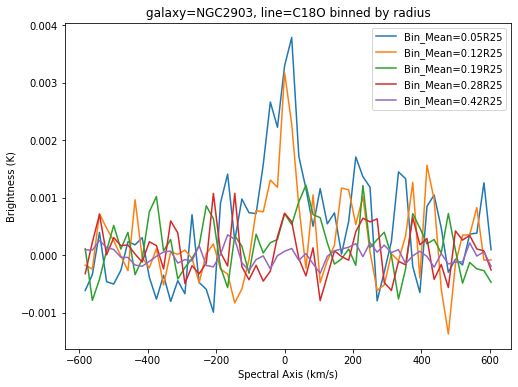

In [6]:
#plot stack profile
plt.figure(figsize=(8,6))
line='C18O' #select line to plot profile
for i in range(len(t)):
    plt.plot(t["spectral_axis"][i],t[line+"_stack_profile"][i],label="Bin_Mean="+"{:.2f}".format(t["bin_mean"][i])+t["bin_unit"][0])
plt.legend()
plt.title("galaxy="+galaxy+", line="+line+" binned by "+bintype)
plt.xlabel('Spectral Axis (km/s)')
plt.ylabel('Brightness (K)')

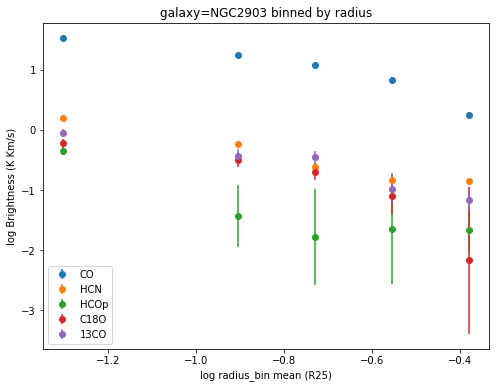

In [93]:
#plot stack sum based on bintype for all lines
plt.figure(figsize=(8,6))
for line in ['CO','HCN','HCOp','C18O','13CO']:
    plt.errorbar(x=np.log10(t["bin_mean"]),y=np.log10(t[line+"_stack_sum"]),yerr=t[line+"_stack_noise"]/t[line+"_stack_sum"]/np.log(10),fmt='o',ls='',label=line)
plt.title("galaxy="+galaxy+" binned by "+bintype)
plt.xlabel('log '+bintype+'_bin mean ('+t["bin_unit"][0]+')')
plt.ylabel('log Brightness (K Km/s)')
plt.legend()

Text(0, 0.5, 'log SFR_mean (Msun/yr/kpc^2)')

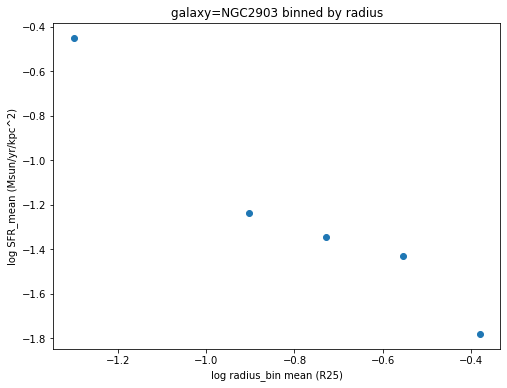

In [7]:
#plot sfr vs. bin_mean
plt.figure(figsize=(8,6))
plt.errorbar(x=np.log10(t["bin_mean"]),y=np.log10(t["sfr_mean_w4fuv"]),fmt='o',ls='')
plt.title("galaxy="+galaxy+" binned by "+bintype)
plt.xlabel('log '+bintype+'_bin mean ('+t["bin_unit"][0]+')')
plt.ylabel('log '+'SFR_mean (Msun/yr/kpc^2)')